# Lien vers le csv :
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

# On import les bibliotheques

In [88]:
import pandas as pd 
import matplotlib.pyplot as plt

# On lis le dataframe en utilisant pandas

In [89]:
df = pd.read_csv("hotel_bookings.csv")

# On fait une petit consultation

In [90]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [91]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [92]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [93]:
null_val = df.isnull().sum()
null_val = null_val[null_val  > 0]
null_val

children         4
country        488
agent        16340
company     112593
dtype: int64

# On nettoi notre data

In [94]:
def wrangle(df):

    df=df.drop(['agent','company'],axis=1)
    df = df.dropna(axis = 0)
    return df 
df = wrangle(df)

# On verifie notre data

In [95]:
null_val = df.isnull().sum()
null_val = null_val[null_val  > 0]
null_val

Series([], dtype: int64)

# On va etudier la distribution de pays

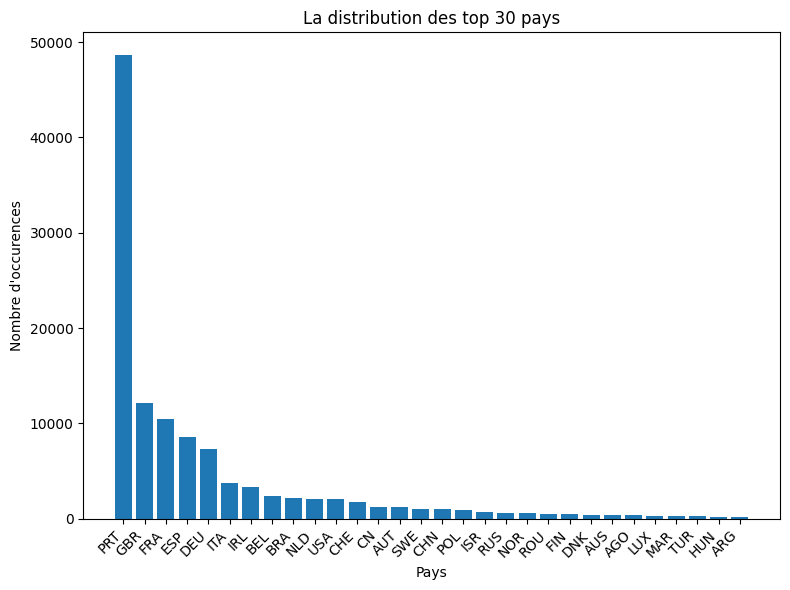

In [77]:
unique_countries = df['country'].value_counts().sort_values(ascending=False)


top_30_countries = unique_countries.head(30)


countries = top_30_countries.index.to_numpy()
counts = top_30_countries.to_numpy()

plt.figure(figsize=(8, 6))  
plt.bar(countries, counts)
plt.xlabel('Pays')
plt.ylabel("Nombre d'occurences")
plt.title('La distribution des top 30 pays')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# On va etudier la distribution de booking par annee

In [97]:
df.arrival_date_year.unique()

array([2015, 2016, 2017], dtype=int64)

Text(0.5, 1.0, 'Booking par an')

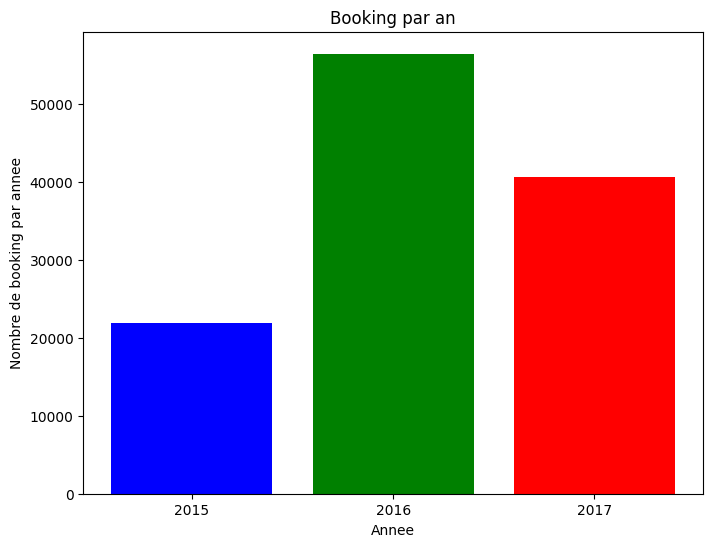

In [35]:
df_2015=df[df.arrival_date_year==2015]
df_2016=df[df.arrival_date_year==2016]
df_2017=df[df.arrival_date_year==2017]

colors = ['blue', 'green', 'red']


plt.figure(figsize=(8, 6))
bars = plt.bar(['2015', '2016', '2017'], [len(df_2015), len(df_2016), len(df_2017)], color=colors)
plt.xlabel('Annee')
plt.ylabel('Nombre de booking par annee')
plt.title('Booking par an')

# Etude de distribution de booking par mois 

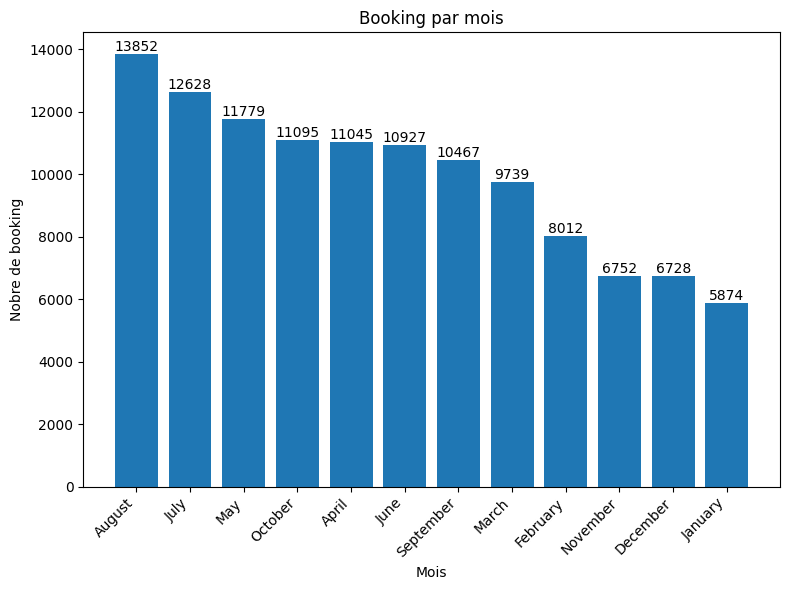

In [100]:
visitors_per_month = df['arrival_date_month'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(visitors_per_month.index, visitors_per_month.values)
plt.xlabel('Mois')
plt.ylabel('Nobre de booking')
plt.title('Booking par mois')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Etude de la distribution de dejeuner

In [49]:
meal_mapping = {'BB': 'petit dejeuner',
                 'HB': 'petit dejeuner et un repas',
                 'FB': 'petit dejeuner et deux repas',
                 'SC':'pas de repas',
                 'Undefined':'pas de repas',
                 }

df['meal'] = df['meal'].replace(meal_mapping)


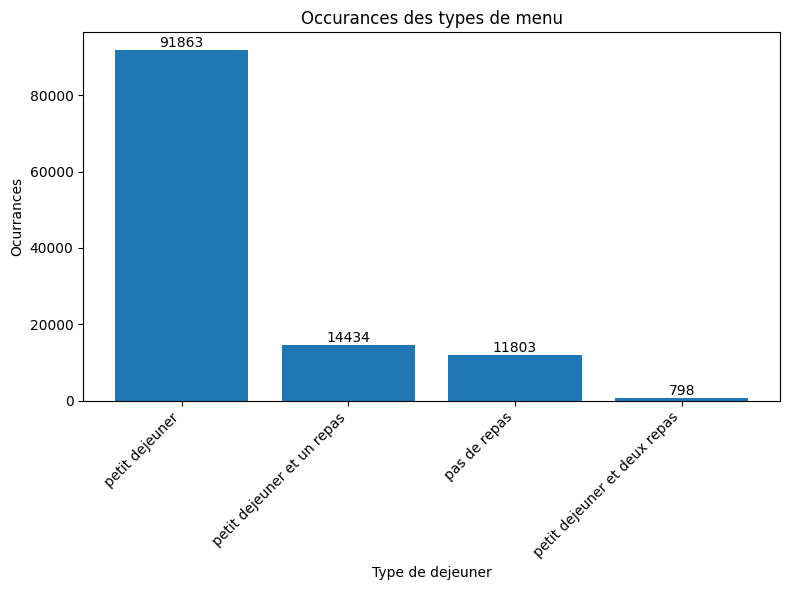

In [51]:
meal_counts = df['meal'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(meal_counts.index, meal_counts.values)
plt.xlabel('Type de dejeuner')
plt.ylabel('Ocurrances')
plt.title('Occurances des types de menu')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Etude de distribution de reservation avec bebe

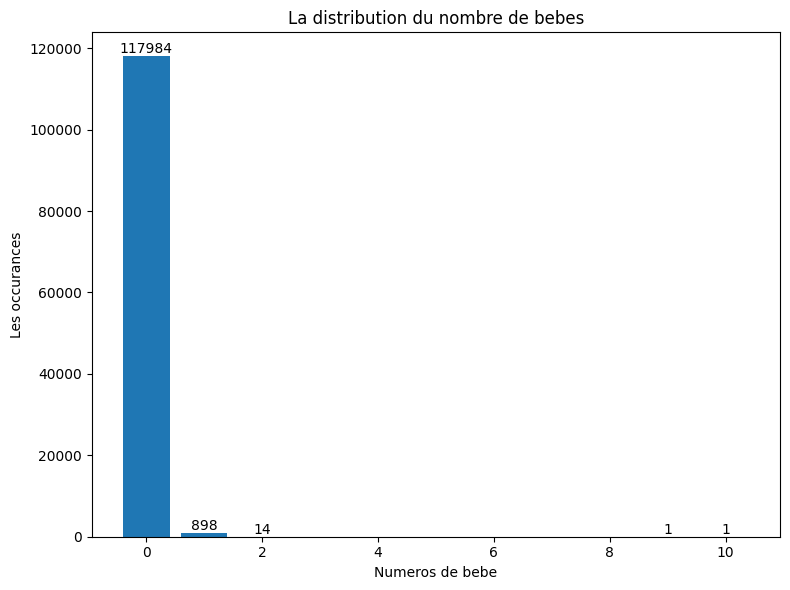

In [57]:
n_babies_counts = df['babies'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(n_babies_counts.index, n_babies_counts.values)
plt.xlabel('Numeros de bebe')
plt.ylabel('Les occurances')
plt.title('La distribution du nombre de bebes')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, int(yval), ha='center', va='bottom')

plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

# Etude de la distribution de clients

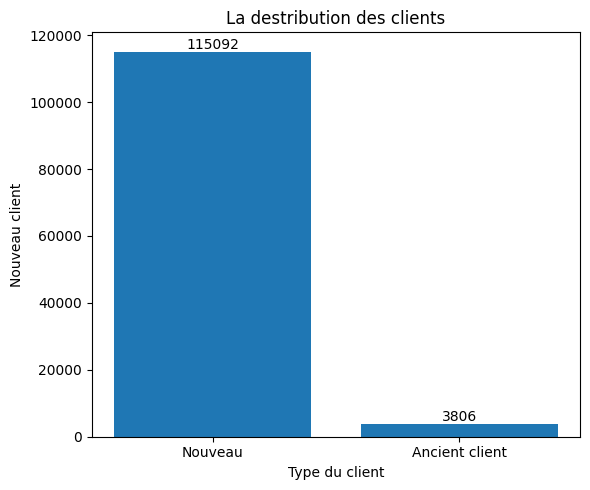

In [66]:
guest_counts = df['is_repeated_guest'].value_counts()


guest_labels = guest_counts.index.to_numpy()  
plt.figure(figsize=(6, 5)) 
bars = plt.bar(guest_labels, guest_counts.values)


plt.xlabel('Type du client')
plt.ylabel('Nouveau client')
plt.title('La destribution des clients')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, int(yval), ha='center', va='bottom')

plt.xticks([0, 1], ['Nouveau', 'Ancient client'])  
plt.tight_layout()
plt.show()
